In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

In [2]:
data =pd.read_csv("genres_v2.csv")

In [3]:
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [4]:
cols=list(data.columns[11:])
del cols[7]

cols

['type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'song_name',
 'Unnamed: 0',
 'title']

In [5]:
df=copy.deepcopy(data)
df.drop(columns=cols,inplace=True)
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo      genre  
0              0.013400    0.0556   0.3890  156.985  Dark Trap  
1              0.000000    0.1180   0.1240  115.080  Dark Trap  
2              0.000004    0.3720   0.0391  218.050  Dark Trap  
3              0.000000    0.1140   0.1750  186.948  Dark Trap  
4              0.000000    0.1660   0.5910  147.988  Dark Trap  
...                 ...       ...      ...      ...        ...  
42300          0.000345    0.1210   0.3940  150.013  hardstyle  
42301          0.000018    0.2050   0.3830  149.928  hardstyle  
42302          0.000242    0.3850   0.1240  154.935  hardstyle  
42303          0.029600    0.0575   0.4880  150.042  hardstyle  
42304          0.000055    0.4140   0.1340  155.047  hardstyle  

[42305 rows x 12 columns]

In [6]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

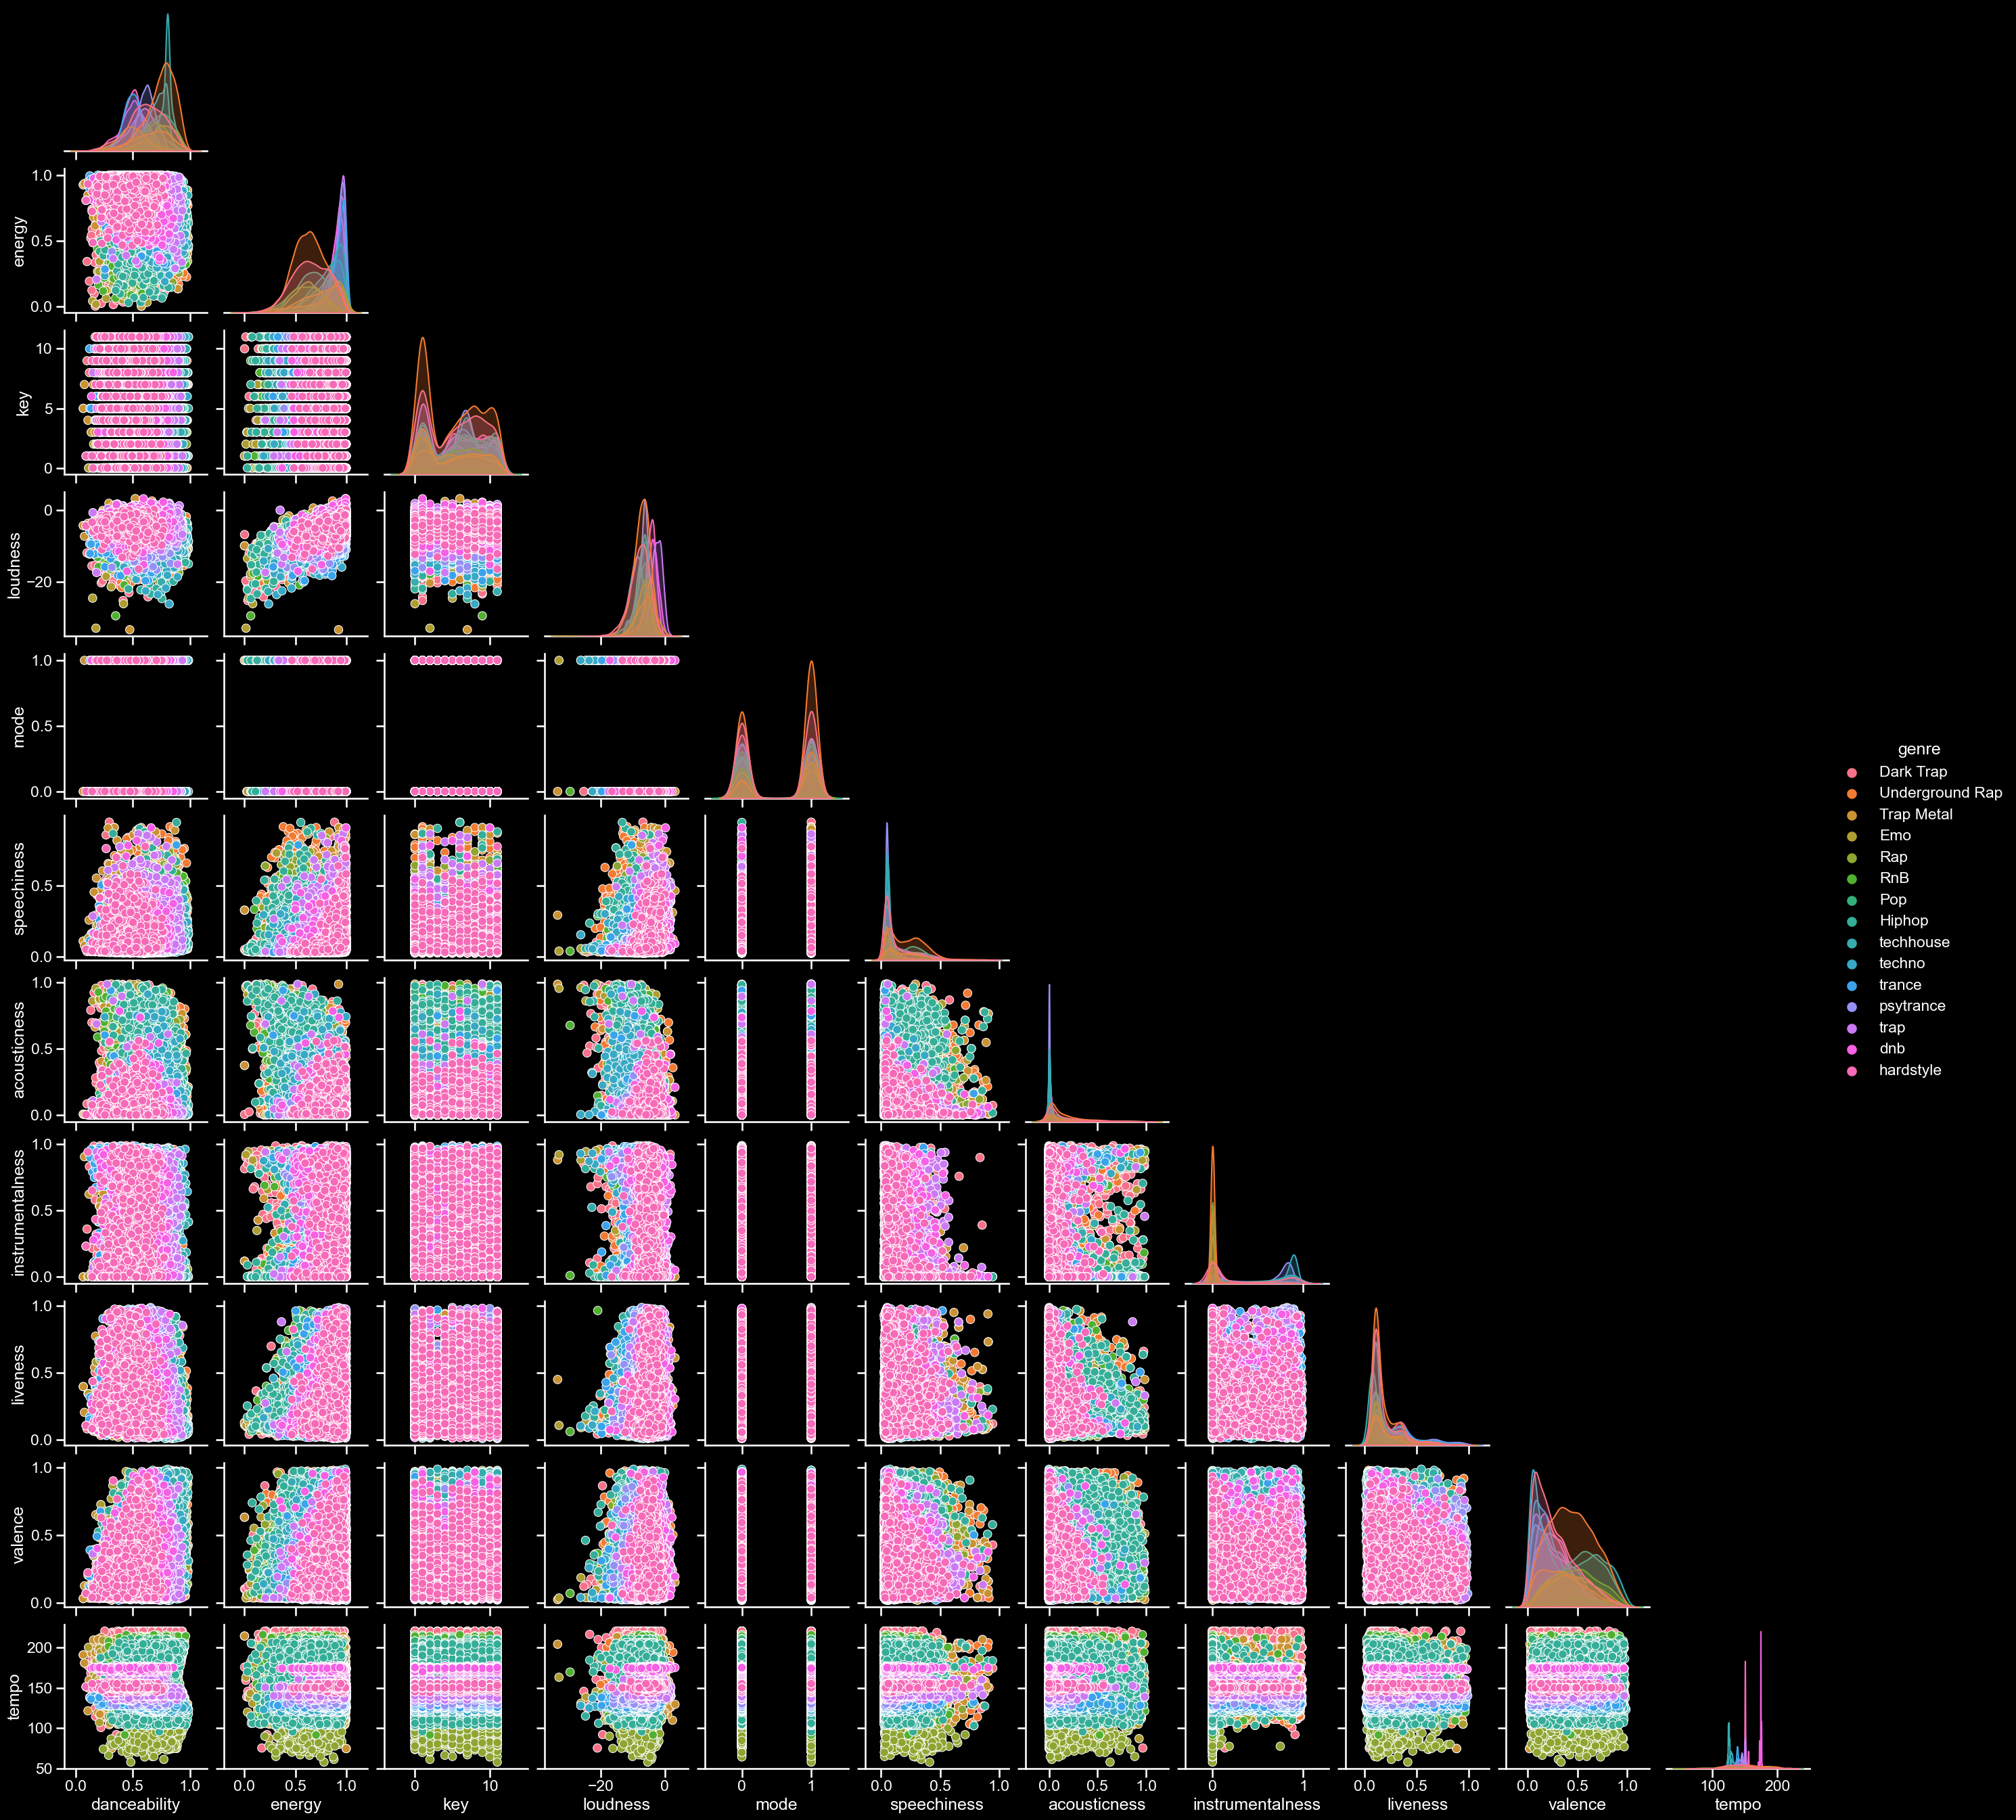

In [7]:
sns.pairplot(df,corner=True,hue='genre')


# Average Time look of a Songs

In [8]:
px.box(data_frame=data,y='duration_ms',color='genre')


In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

<AxesSubplot:>

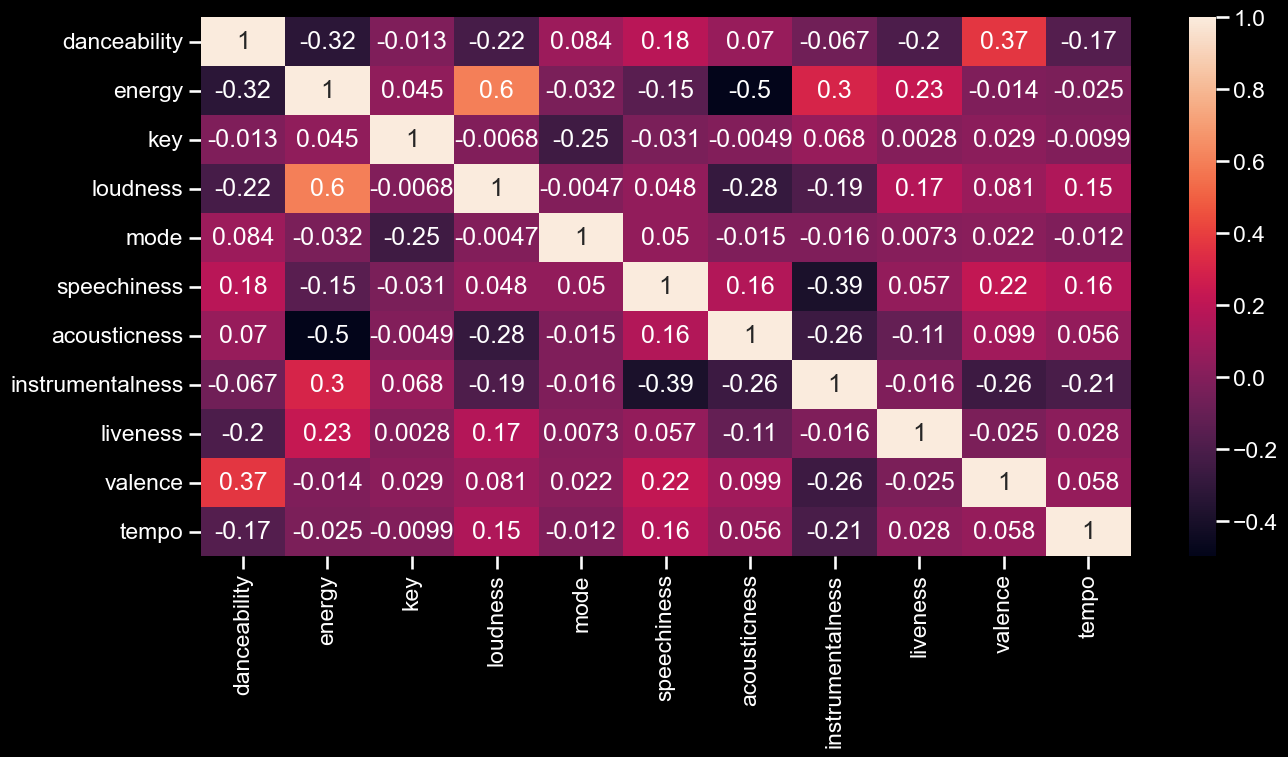

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [11]:
data=data.dropna(subset=['song_name'])

In [12]:
df=data[data.columns[:11]]
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200       0.05980   
1             0.719   0.493    8    -7.230     1       0.0794       0.40100   
2             0.850   0.893    5    -4.783     1       0.0623       0.01380   
3             0.476   0.781    0    -4.710     1       0.1030       0.02370   
4             0.798   0.624    2    -7.668     1       0.2930       0.21700   
...             ...     ...  ...       ...   ...          ...           ...   
21520         0.538   0.819    1    -6.780     1       0.4670       0.00854   
21521         0.415   0.548    7    -8.563     1       0.2850       0.22400   
21522         0.785   0.648    7    -6.907     1       0.2790       0.01570   
21523         0.747   0.832    3    -5.737     0       0.1850       0.23300   
21524         0.816   0.775   11    -3.323     1       0.2340       0.16000   

       instrumentalness  liveness  valence    tempo  
0              0.013400    0.0556   0.3890  156.985  
1              0.000000    0.1180   0.1240  115.080  
2              0.000004    0.3720   0.0391  218.050  
3              0.000000    0.1140   0.1750  186.948  
4              0.000000    0.1660   0.5910  147.988  
...                 ...       ...      ...      ...  
21520          0.000000    0.1310   0.2520  160.299  
21521          0.000000    0.1220   0.5280  154.272  
21522          0.001980    0.1000   0.5060  184.160  
21523          0.000014    0.1300   0.7330  188.760  
21524          0.000310    0.0543   0.5270  186.862  

[21519 rows x 11 columns]

In [13]:
df['genre']=data['genre']
df['time_signature']=data['time_signature']
df['duration_ms']=data['duration_ms']
df['song_name']=data['song_name']

In [14]:
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200       0.05980   
1             0.719   0.493    8    -7.230     1       0.0794       0.40100   
2             0.850   0.893    5    -4.783     1       0.0623       0.01380   
3             0.476   0.781    0    -4.710     1       0.1030       0.02370   
4             0.798   0.624    2    -7.668     1       0.2930       0.21700   
...             ...     ...  ...       ...   ...          ...           ...   
21520         0.538   0.819    1    -6.780     1       0.4670       0.00854   
21521         0.415   0.548    7    -8.563     1       0.2850       0.22400   
21522         0.785   0.648    7    -6.907     1       0.2790       0.01570   
21523         0.747   0.832    3    -5.737     0       0.1850       0.23300   
21524         0.816   0.775   11    -3.323     1       0.2340       0.16000   

       instrumentalness  liveness  valence    tempo      genre  \
0              0.013400    0.0556   0.3890  156.985  Dark Trap   
1              0.000000    0.1180   0.1240  115.080  Dark Trap   
2              0.000004    0.3720   0.0391  218.050  Dark Trap   
3              0.000000    0.1140   0.1750  186.948  Dark Trap   
4              0.000000    0.1660   0.5910  147.988  Dark Trap   
...                 ...       ...      ...      ...        ...   
21520          0.000000    0.1310   0.2520  160.299     Hiphop   
21521          0.000000    0.1220   0.5280  154.272     Hiphop   
21522          0.001980    0.1000   0.5060  184.160     Hiphop   
21523          0.000014    0.1300   0.7330  188.760     Hiphop   
21524          0.000310    0.0543   0.5270  186.862     Hiphop   

       time_signature  duration_ms  \
0                   4       124539   
1                   4       224427   
2                   4        98821   
3                   3       123661   
4                   4       123298   
...               ...          ...   
21520               4       209582   
21521               4       213898   
21522               4       271867   
21523               4       182040   
21524               4       270587   

                                           song_name  
0                                Mercury: Retrograde  
1                                          Pathology  
2                                           Symbiote  
3      ProductOfDrugs (Prod. The Virus and Antidote)  
4                                              Venom  
...                                              ...  
21520                                   Daddy's Girl  
21521                                            '94  
21522                                    Born 2 Live  
21523                                  Can't Hold On  
21524                                   Still D.R.E.  

[21519 rows x 15 columns]

# Recommendation System Using Euclidean Distance

In [15]:
#This is a function to find the closest song name from the list

def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
            
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True) 
    return words[t[0][1]]

In [16]:
# Making a weight matrix using euclidean distance
def make_matrix(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])

In [ ]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
make_matrix(df,a,b)

# Recommendation System Using Cosine Similarity Distance

In [ ]:
def make_matrix_cosine(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])

In [ ]:
c=input('Please enter The name of the song :')
d=int(input('Please enter the number of recommendations you want: '))
make_matrix_cosine(df,c,d)

# Making a recommendation System using Correlation Distance

In [ ]:
def make_matrix_correlation(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])

In [ ]:
e=input('Please enter The name of the song :')
f=int(input('Please enter the number of recommendations you want: '))
make_matrix_correlation(df,e,f)